# Retail Giant Sales Forecasting Assignment

#### Business problem
Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

 

As a sales manager for this store, you have to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly.

### PART  A - Data Preparation
        1. Reading the Data
        2. Calculate CoV
        
### PART B - Build and Evaluate Time Series Forecast
         1. Time series Decomposition
                        a) Additive seasonal decomposition
                        b) Multiplicative seasonal decomposition
         2. Exponential smoothing methods
                        a) Simple exponential smoothing
                        b) Holt's method with trend:
                        c) Holt Winters' additive method with trend and seasonality
                        d) Holt Winter's multiplicative method with trend and seasonality
         3. Auto Regressive methods
                        a) Stationary tests
                        b) Conversion of Non-Stationary to Stationary
                        c) Auto regression method (AR)
                        d) Moving average method (MA)
                        e) Auto regression moving average method (ARMA)
                        f) Auto regressive integrated moving average (ARIMA)
                        g) Seasonal auto regressive integrated moving average (SARIMA)                                     
          4. Conclusion

# PART A - Data Preparation

## 1. Reading the Data

### Import required packages

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Import Timeseries data

In [2]:
data=pd.read_csv('Global+Superstore+Data.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [4]:
#Check Missing Values
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

##### There are no missing values in the data

In [5]:
# Convert the order date in to year-month format
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [6]:
# Check top 5 value in dataframe
data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-05,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-05,Consumer,Africa,2832.960,311.5200


In [7]:
#Sorting data using Order Date
data.sort_values(by='Order Date', inplace=True)

In [8]:
# Check top 5 value in dataframe
data.head()

,Order Date,Segment,Market,Sales,Profit
15262,2011-01,Corporate,EU,139.65,15.30
26744,2011-01,Consumer,EU,88.44,15.84
48614,2011-01,Corporate,EU,11.43,4.11
9417,2011-01,Consumer,LATAM,491.00,122.70
48590,2011-01,Home Office,US,4.71,0.00


In [9]:
#Creating Market-Segment column by concatenation
data['Market-Segment'] = data['Market']+"-"+data['Segment']
data.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
15262,2011-01,Corporate,EU,139.65,15.30,EU-Corporate
26744,2011-01,Consumer,EU,88.44,15.84,EU-Consumer
48614,2011-01,Corporate,EU,11.43,4.11,EU-Corporate
9417,2011-01,Consumer,LATAM,491.00,122.70,LATAM-Consumer
48590,2011-01,Home Office,US,4.71,0.00,US-Home Office


In [10]:
# Create Pivot
data_ag=pd.pivot_table(data,index='Order Date',columns='Market-Segment', values='Profit',aggfunc='sum')
data_ag.head()

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


### Split the data in to Train and Test

In [11]:
train_len=42
train_df = data_ag[0:train_len] # first 42 months as training set
test_df = data_ag[train_len:] # last 6 months as test set

In [12]:
# Find Shape
train_df.shape, test_df.shape

((42, 21), (6, 21))

In [13]:
# Check top 5 value in train dataframe
train_df.head()

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


## 2 . Calculating CoV

In [14]:
#Create Empty dataframe
cov=pd.DataFrame(columns=['Market-Segment','CoV','profit'])
cov.head()

,Market-Segment,CoV,profit


In [15]:
#Calculating and appending CoV and profit as per Market Segment
for i in train_df.columns:
    t={'Market-Segment':i,'CoV':np.std(train_df[i])/np.mean(train_df[i]),'profit':np.mean(train_df[i])}
    cov = cov.append(t, ignore_index = True)

In [16]:
cov.sort_values(by='CoV')

,Market-Segment,CoV,profit
0,APAC-Consumer,0.522725,4400.894243
1,APAC-Corporate,0.530051,2574.919807
12,EU-Consumer,0.595215,3699.977143
15,LATAM-Consumer,0.683770,2295.555697
13,EU-Corporate,0.722076,2216.299429
16,LATAM-Corporate,0.882177,1122.633016
14,EU-Home Office,0.938072,1224.456536
2,APAC-Home Office,1.008219,1511.088314
18,US-Consumer,1.010530,2686.740912
19,US-Corporate,1.071829,1754.199083


##### This concludes that Lower the CoV value, higher is the Profit
##### Hence 'APAC-Consumer' is the most profitable Market-Segment with CoV = 0.522725

# PART B - Build and Evaluate Time Series Forecast

In [17]:
# Extracting the most profitable segment i.e "APAC-Consumer"
data1 = data[data['Market-Segment']=='APAC-Consumer']

In [18]:
# Check top 5 value in dataframe
data1.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
1080,2011-01,Consumer,APAC,1429.050,371.490,APAC-Consumer
9203,2011-01,Consumer,APAC,219.780,59.340,APAC-Consumer
19331,2011-01,Consumer,APAC,342.510,54.600,APAC-Consumer
26270,2011-01,Consumer,APAC,102.762,1.842,APAC-Consumer
14830,2011-01,Consumer,APAC,420.420,147.000,APAC-Consumer


In [19]:
# We will be requiring Order date and Sales columns
data1=data1[['Order Date','Sales']]

In [20]:
# Check top 5 value in dataframe
data1.head()

,Order Date,Sales
1080,2011-01,1429.050
9203,2011-01,219.780
19331,2011-01,342.510
26270,2011-01,102.762
14830,2011-01,420.420


In [21]:
# Grouping Order Date column
data2 = data1.groupby(by='Order Date').sum()

In [22]:
# Check top 5 value in dataframe
data2.head()

,Sales
Order Date,
2011-01,18821.9898
2011-02,23313.3531
2011-03,26518.4919
2011-04,12046.0923
2011-05,25941.9000


In [23]:
# Converting Order Date to to_timestamp for furhter forecasting
data2 = data2.to_timestamp()

In [24]:
# Check top 5 value in dataframe
data2.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [25]:
#Check Shape of Dataframe
data2.shape

(48, 1)

### Plot Time Series Data

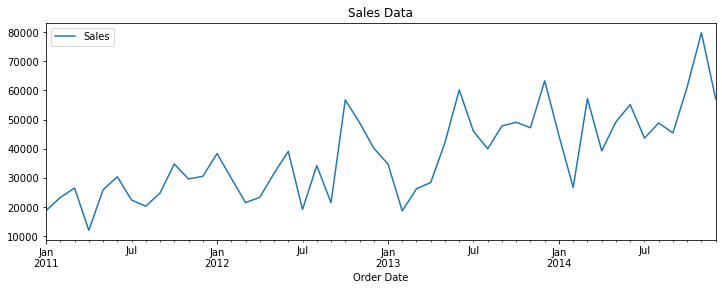

In [26]:
data2.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('Sales Data')
plt.show()

## 1. Time series Decomposition

### a) Additive seasonal decomposition

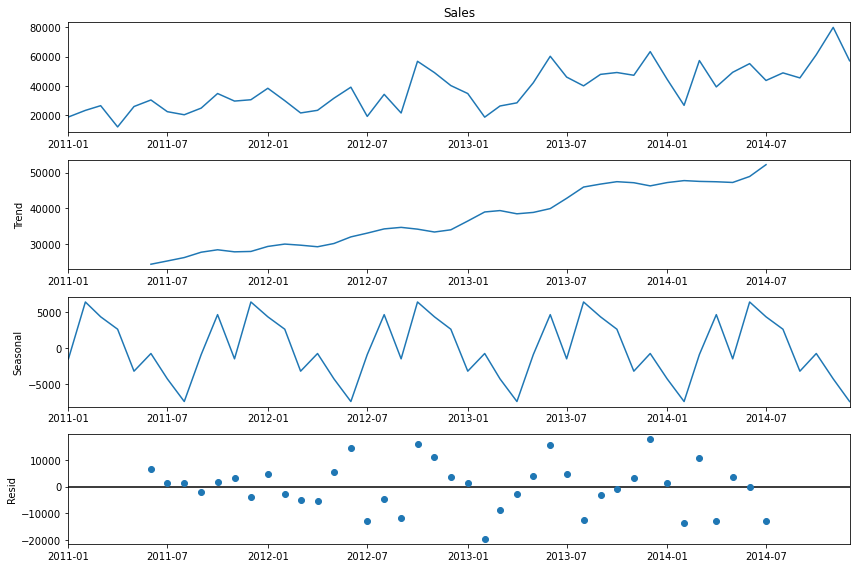

In [27]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data2.Sales, model='additive',freq = 10) # additive seasonal index
fig = decomposition.plot()
plt.show()

### b) Multiplicative seasonal decomposition:

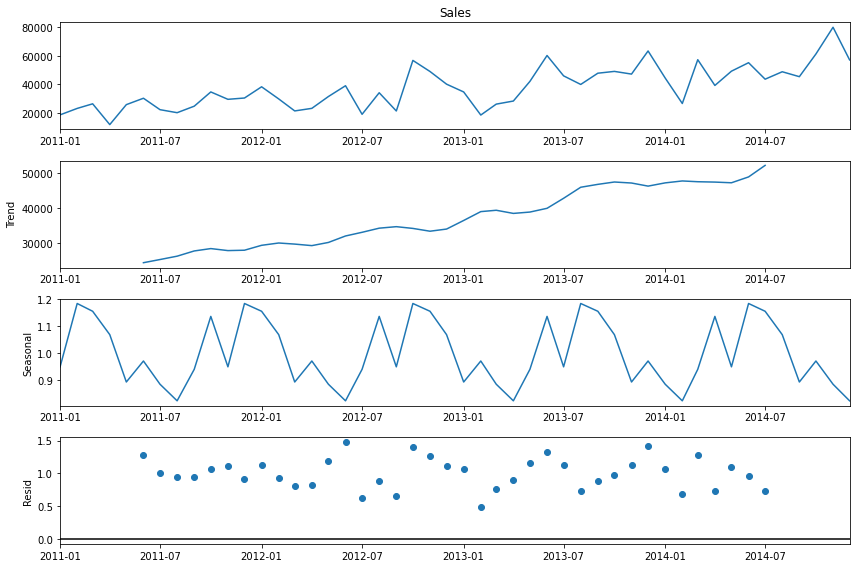

In [28]:
decomposition = sm.tsa.seasonal_decompose(data2.Sales, model='multiplicative',freq=10) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

#### From the above decompostion we can see three components. They are "Trend component", "Seasonal component" and "Residual component (noise)".

### Split the data in to Train and Test set

In [29]:
train_len2 = 42
train2 = data2[0:train_len2] # first 42 months as training set
test2 = data2[train_len2:] # last 6 months as testing set

In [30]:
# Check shape
train2.shape,test2.shape

((42, 1), (6, 1))

## 2. Exponential smoothing methods:

### a) Simple exponential smoothing:

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train2['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test2.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

C:\Users\prach\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

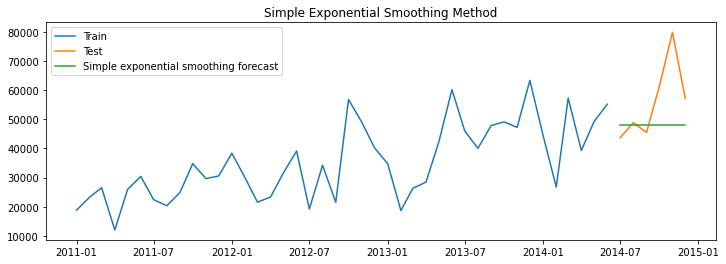

In [32]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [33]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_ses['ses_forecast'])/test2['Sales'])*100,2)

results = pd.DataFrame({'Method':['Simple exponential smoothing method'],'MAPE': [mape] })
results

,Method,MAPE
0,Simple exponential smoothing method,15.74


### b) Holt's method with trend:

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train2['Sales']),seasonal_periods=12,trend='additive',seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test2.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test2))

{'smoothing_level': 0.2642857142857143, 'smoothing_trend': 0.19220779220779222, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 18821.989799999996, 'initial_trend': 4491.3633000000045, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prach\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

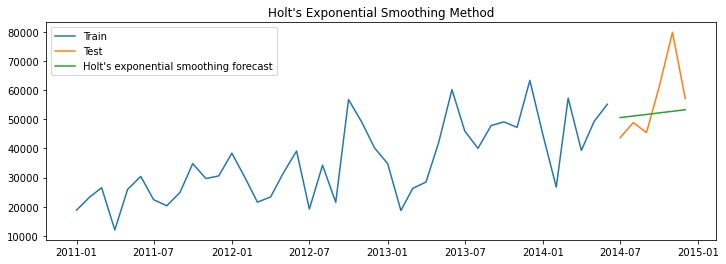

In [35]:
plt.figure(figsize=(12,4))
plt.plot( train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate MAPE

In [36]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_holt['holt_forecast'])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93


### c) Holt Winters' additive method with trend and seasonality:

In [37]:
y_hat_hwa = test2.copy()
model = ExponentialSmoothing(np.asarray(train2['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prach\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

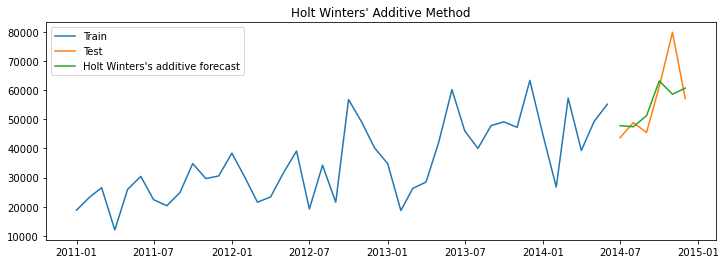

In [38]:
plt.figure(figsize=(12,4))
plt.plot( train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate MAPE

In [39]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_hwa['hw_forecast'])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method','MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93
0,Holt Winters' additive method,10.17


### d) Holt Winter's multiplicative method with trend and seasonality

In [40]:
y_hat_hwm = test2.copy()
model = ExponentialSmoothing(np.asarray(train2['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325, 'initial_trend': 730.4167145833331, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\prach\miniconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plot train, test and forecast

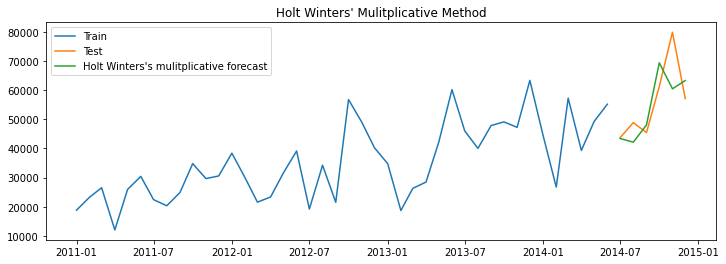

In [41]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate MAPE

In [42]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_hwm['hw_forecast'])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93
0,Holt Winters' additive method,10.17
0,Holt Winters' multiplicative method,11.43


#### Conclusion 1 - In the smoothing techniques 'Holt Winters Additive' forecast is able to predict the sales closer to the actual values and has the lowest MAPE value among all the methods done above.

## 3. Auto Regressive methods:

### a) Stationary tests:

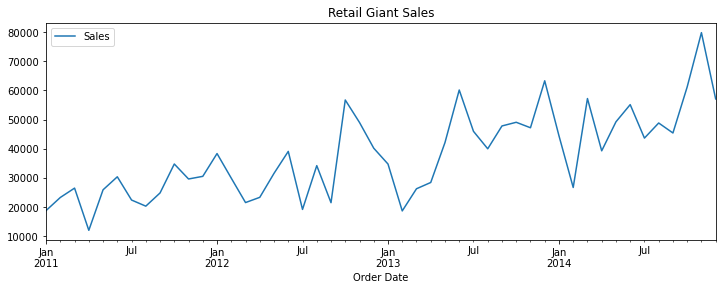

In [43]:
data2['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [44]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data2['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [45]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data2['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


As per the 'p' values from the above two stationary tests we can infer that the series is not stationary

### b) Conversion of Non-Stationary to Stationary

#### Box Cox transformation to make variance constant

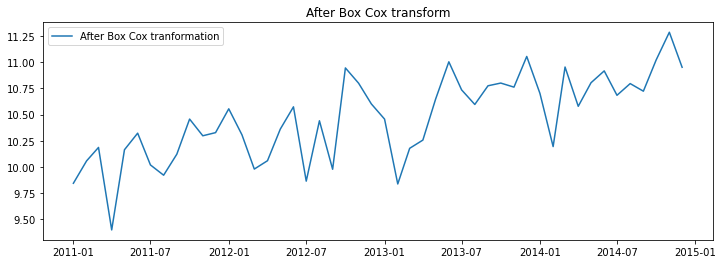

In [46]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data2['Sales'], lmbda=0), index = data2.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

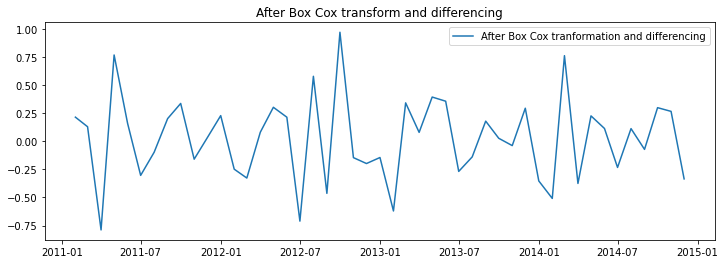

In [47]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data2.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [48]:
data_boxcox_diff.dropna(inplace=True)

In [49]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [50]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [51]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\prach\miniconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


As per the 'p' values from the above stationary tests we can infer that the series is stationary.

### Splitting the Boxcox transformed data

In [52]:
train_data_boxcox = data_boxcox[:train_len2]
test_data_boxcox = data_boxcox[train_len2:]
train_data_boxcox_diff = data_boxcox_diff[:train_len2-1]
test_data_boxcox_diff = data_boxcox_diff[train_len2-1:]

### c) Auto regression method (AR):

In [53]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


### Recover original time series

In [54]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

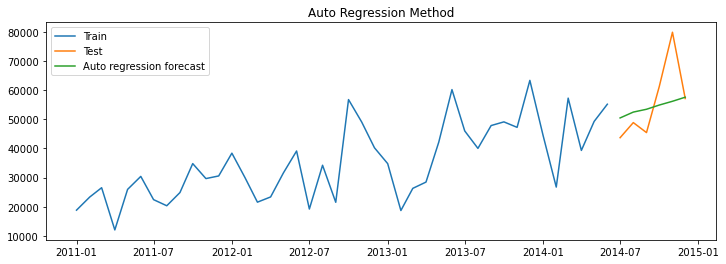

In [55]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test2.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate MAPE

In [56]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_ar['ar_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93
0,Holt Winters' additive method,10.17
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56


### d) Moving average method (MA):

In [57]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [58]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])


### Plot train, test and forecast

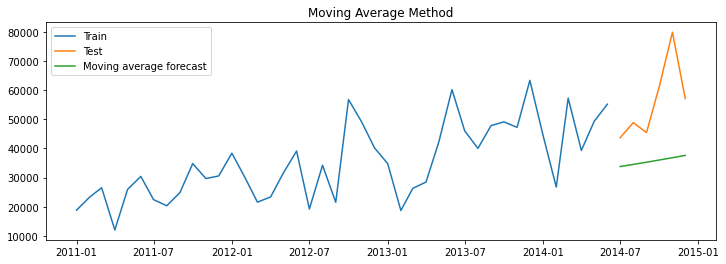

In [59]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test2.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate MAPE

In [60]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_ma['ma_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93
0,Holt Winters' additive method,10.17
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93


### e) Auto regression moving average method (ARMA):

In [61]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover original time series

In [62]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

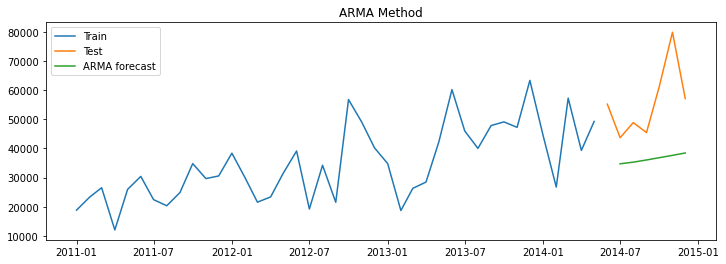

In [63]:
plt.figure(figsize=(12,4))
plt.plot(data2['Sales'][:train_len-1], label='Train')
plt.plot(data2['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test2.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate MAPE

In [64]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_arma['arma_forecast'][train_len2-1:])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93
0,Holt Winters' additive method,10.17
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40


### f) Auto regressive integrated moving average (ARIMA):

In [65]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover original time series forecast

In [66]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

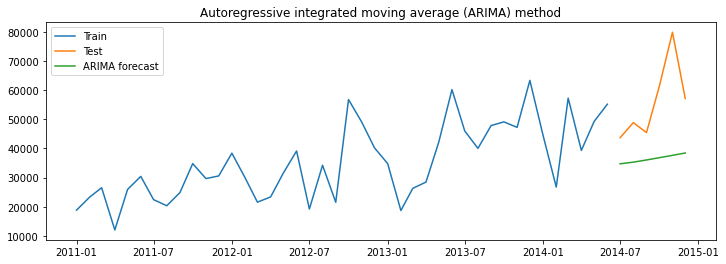

In [67]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test2.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate MAPE

In [68]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_arima['arima_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['ARIMA method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93
0,Holt Winters' additive method,10.17
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40
0,ARIMA method,32.40


### g) Seasonal auto regressive integrated moving average (SARIMA):

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041622
ma.L1      -0.996737
ar.S.L12    0.099996
ma.S.L12   -0.968194
sigma2      0.058472
dtype: float64


### Recover original time series forecast

In [70]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

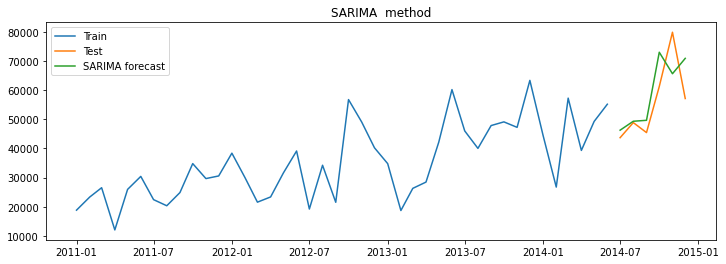

In [71]:
plt.figure(figsize=(12,4))
plt.plot(train2['Sales'], label='Train')
plt.plot(test2['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test2.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('SARIMA  method')
plt.show()

### Calculate MAPE

In [72]:
mape = np.round(np.mean(np.abs(test2['Sales']-y_hat_sarima['sarima_forecast'][test2.index.min():])/test2['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMA Method'],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method','MAPE']]
results

,Method,MAPE
0,Simple exponential smoothing method,15.74
0,Holt's exponential smoothing method,14.93
0,Holt Winters' additive method,10.17
0,Holt Winters' multiplicative method,11.43
0,Autoregressive (AR) method,13.56
0,Moving Average (MA) method,33.93
0,Autoregressive moving average (ARMA) method,32.40
0,ARIMA method,32.40
0,SARIMA Method,12.88


#### Conclusion 2 - In the Auto Regressive techniques 'SARIMA' forecast is able to predict the sales closer to the actual values and has the lowest MAPE value among all the methods done above.

## 4) Conclusion:
#### “Holts’s winter Additive method” in case of smoothing techniques whereas “SARIMA” in case of Auto Regressive methods.
#### Between “Holt’s winter method” and “SARIMA” methods , “Holts Winter's Additive Method” is the best for the sales forecast as it has low MAPE value compared to other Methods.